In [3]:
import openai
import pandas as pd
from tqdm import tqdm
import json
import time
import random
import pickle
import math

# load the API
openai.api_type = "azure"
openai.api_version = "2023-07-01-preview"
openai.api_base = "https://structuralfactorsofsuicide.openai.azure.com/"
openai.api_key = "f678e6405d5f46099018cd5c9370758f"

FinancialLabel = "Financial/Job Problem"
Legallabel = "Legal Problem"
SchoolLabel = "School or Academic Related Problem"
HealthLabel = "Lack of Access to Health/Mental Health Care"
FinancialPredicted = "Financial - Predicted"
LegalPredicted = "Legal - Predicted"
SchoolPredicted = "School - Predicted"
HealthPredicted = "Health - Predicted"

In [2]:
combinedzeroshot = "Suicide is the act of intentionally causing one's own death or taking their own life by any means. You are a public health professional. You are going through news articles from across the USA that mention suicide and your task is to identify the cause of the suicide talked about in the article. The article may not use the word ‘suicide’, instead explain it in another way, such as ‘he took his own life’ or a different expression that has the same meaning. \n You have to categorize the articles in one or more of the following categories: \n\n 1) 'Financial/Job Problem' : If there is mention of a person or multiple people who killed themselves due to financial or work related problems or bad financial state or an incident at their place of employment. \n 2) ‘School Problem' : If there is mention of a person or multiple people who killed themselves due to an academic or school related problem. \n 3) 'Health Problem' : if there is mention of a person or multiple people who killed themselves due to lack of access to mental or physical health care or treatment. \n 4) ‘Legal Problem' : If there is mention of a person or multiple people who killed themselves after facing a legal problem or being involved or suspected or targeted in a violation of the law. \n 5) ‘None’ : If there is no explicit mention of a person who committed suicide or killed themselves or if suicide was attempted or threatened but the person did not die or if the reason of suicide is not aligned with any of the above 4 categories. \n\n Now, read the following news article answer the following 2 questions: \n 1. Is there mention of a person or multiple people who died after committing suicide or killed themselves? Provide your answer in the following format: \n Answer 1: Yes or No  \n 2. Identify which of the above categories does the article belong to. An article can belong to more than one category. Also provide a reasoning for the same in the following format:\nAnswer 2: \nReasoning:\n\nArticle: "


In [4]:
# import pandas as pd
# # below is the datatset annotated by Jay
# data = pd.read_csv('final_dataset_06102022 2.csv')
# data = data[data['Yes'] == 1]
# pattern = r'^news[0-6]_'
# datacopy = data.copy()
# datacopy['Document name'] = data['Document name'].str.replace(pattern, '', regex=True)

# relevant = data[data['Yes']==1]
# print(relevant.shape)
# print(data.shape)
# selected_rows = data[(data[FinancialLabel] > 0) | (data[Legallabel] > 0) | (data[HealthLabel] > 0) | (data[SchoolLabel] > 0)]
# financial_problem = data[data[FinancialLabel] > 0]
# school_problem = data[data[SchoolLabel] > 0]
# legal_problem = data[data[Legallabel] > 0]
# health_problem = data[data[HealthLabel] > 0]
# unspecified_circumstance = data[data['Unspecified Circumstance'] > 0]

# print("Legal Problem : ", legal_problem.shape[0])
# print("Financial/Job Problem : ", financial_problem.shape[0])
# print("Lack of Access to Health/Mental Health Care : ", health_problem.shape[0])
# print("School or Academic Related Problem : ", school_problem.shape[0])
# # print("")

In [5]:
# maindf = pd.DataFrame(selected_rows, columns=['Document group', 'Document name', FinancialLabel, SchoolLabel, Legallabel, HealthLabel])
# arrayoftexts = []
# for documentname in maindf['Document name']:
#     with open("articles/"+ documentname + ".txt") as f:
#         text = f.readlines()
#         arrayoftexts.append(text[0])
# maindf['Text'] = arrayoftexts
# maindf = maindf[['Text', FinancialLabel, Legallabel, HealthLabel, SchoolLabel]]

In [6]:
# arts = maindf['Text'].to_list()
# cat = []
# f = [0] * len(arts)
# h = [0] * len(arts)
# l = [0] * len(arts)
# s = [0] * len(arts)
# #arts = financial_problem_df['Text'].to_list()
# financialpred = [0] * len(arts) 
# reason = [""] * len(arts)

In [7]:
# for i in tqdm(range(0, 50)):
#     try:
#         # generate response
#         if (reason[i] != ""):
#             continue
#         print(i)
#         prompt = combinedzeroshot + "\n" + "Article: " + arts[i] + "\n"
#         response = openai.ChatCompletion.create(
#             model="gpt-4",
#             engine="StructuralFactorsOfSuicidegpt4", # engine with high TPM rate limit; no content filter
#             messages=[
#                 {
#                     "role": "user",
#                     "content": prompt,
#                 },
#             ],
#             temperature=0.0
#         )
#         chatgpt_output = json.dumps(response['choices'][0]['message']['content'])
#         print(chatgpt_output)
#         if ("1: No" in chatgpt_output):
#             reason[i] = "NotSuicide"
#             continue
#         if ('Legal Problem' in chatgpt_output):
#             l[i] = 1
#         if ('Financial/Job Problem' in chatgpt_output):
#             f[i] = 1
#         if ('School Problem' in chatgpt_output):
#             s[i] = 1
#         if ('Health Problem' in chatgpt_output):
#             h[i] = 1
#         reason[i] = chatgpt_output
#     except Exception as e:
#         print(i)
#         print(str(e))
        
#     time.sleep(2)
        
# # maindf['Financial - Predicted'] = financialpred
# # maindf['Financial - Reason'] = reason

In [8]:
# maindf['Reasoning'] = reason
# maindf[FinancialPredicted] = f
# maindf[SchoolPredicted] = s
# maindf[HealthPredicted] = h
# maindf[LegalPredicted] = l

In [9]:
# maindf[FinancialLabel] = maindf[FinancialLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[HealthLabel] = maindf[HealthLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[SchoolLabel] = maindf[SchoolLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[Legallabel] = maindf[Legallabel].apply(lambda x: 1 if x > 0 else x)

# financialmatch = len(maindf[(maindf[FinancialPredicted] > 0) & (maindf[FinancialLabel] > 0)])
# legalmatch = len(maindf[(maindf[LegalPredicted] > 0) & (maindf[Legallabel] > 0)])
# schoolmatch = len(maindf[(maindf[SchoolPredicted] > 0) & (maindf[SchoolLabel] > 0)])
# healthmatch = len(maindf[(maindf[HealthPredicted] > 0) & (maindf[HealthLabel] > 0)])

# print(financialmatch)
# print(legalmatch)
# print(schoolmatch)
# print(healthmatch)

# financialmatch = len(maindf[(maindf[FinancialPredicted] > 0) & (maindf[FinancialLabel] == 0)])
# legalmatch = len(maindf[(maindf[LegalPredicted] > 0) & (maindf[Legallabel] == 0)])
# schoolmatch = len(maindf[(maindf[SchoolPredicted] > 0) & (maindf[SchoolLabel] == 0)])
# healthmatch = len(maindf[(maindf[HealthPredicted] > 0) & (maindf[HealthLabel] == 0)])

# print(financialmatch)
# print(legalmatch)
# print(schoolmatch)
# print(healthmatch)

In [10]:
# from sklearn.metrics import hamming_loss, accuracy_score, f1_score
# y_true = maindf[[FinancialLabel, Legallabel, SchoolLabel, HealthLabel]].values
# y_pred = maindf[[FinancialPredicted, LegalPredicted, SchoolPredicted, HealthPredicted]].values
# print(y_true.shape)
# print(y_pred.shape)
# hl = hamming_loss(y_true, y_pred)
# print("Hamming Loss:", hl)

# accuracy = accuracy_score(y_true, y_pred)
# print("Subset accuracy: ", accuracy)

# f1score = f1_score(y_true, y_pred, average='macro')
# print("Macro averaged F1 score: ", f1score)

# f1score = f1_score(y_true, y_pred, average='micro')
# print("Micro averaged F1 score: ", f1score)

# y_true = maindf[FinancialLabel].values
# y_pred = maindf[FinancialPredicted].values
# f1score = f1_score(y_true, y_pred)
# print("Financial problem F1 score: ", f1score)

# y_true = maindf[Legallabel].values
# y_pred = maindf[LegalPredicted].values
# f1score = f1_score(y_true, y_pred)
# print("Legal problem F1 score: ", f1score)

# y_true = maindf[SchoolLabel].values
# y_pred = maindf[SchoolPredicted].values
# f1score = f1_score(y_true, y_pred)
# print("School problem F1 score: ", f1score)

# y_true = maindf[HealthLabel].values
# y_pred = maindf[HealthPredicted].values
# f1score = f1_score(y_true, y_pred)
# print("Health problem F1 score: ", f1score)

In [11]:
# Dataset from ben Horne
# bendata = pd.read_csv('Transfer/article_matches.csv')
# bendata.head(3)
# print(bendata.shape)

# print(bendata[bendata['content'].isna()])

# bendata = bendata[~bendata['content'].isna()]
# suicide_Articles_from_ben_data = bendata['content'].tolist()

# wordcount = 0.0
# maxlen = 0
# minlen = 100000
# maxlens = []
# for art in suicide_Articles_from_ben_data:
#     wordcount += len(art.split())
#     maxlens.append(len(art.split()))
#     maxlen = max(maxlen, len(art.split()))
#     minlen = min(minlen, len(art.split()))

# print("Average word count: ", wordcount/len(suicide_Articles_from_ben_data))
# print("Max word count: ", maxlen)
# print("Min word count: ", minlen)

# ids = bendata['id']
# publisher = []
# date = []
# title = []

# for i in ids.tolist():
#     if (i == ""):
#         print("gadbad1")
#     diffs = i.split("--", maxsplit=2)
#     if (len(diffs) != 3):
#         print("gadbad2")
#         print(i)
#     publisher.append(diffs[0])
#     date.append(diffs[1])
#     title.append(diffs[2])

# bendata["Publisher"] = publisher
# bendata["Date Published"] = date

In [12]:
maindf = pd.read_csv('/Users/minijain/Downloads/SocWebLab/Structural_Violence/final_list_of_articles.csv')
print(maindf.shape)

mask = maindf['content'].str.contains('|'.join(strs))
filtered_df = maindf[mask]
unfiltered = maindf[~mask]
print(unfiltered.shape)
print(filtered_df.shape)

(22021, 12)
(463, 12)
(21558, 12)


In [13]:
#maindf = data[~data['Financial/Job Problem'].isna()]
print(maindf.shape)

(22021, 12)


In [14]:
arts = maindf['content'].to_list()
cat = []
f = [0] * len(arts)
h = [0] * len(arts)
l = [0] * len(arts)
s = [0] * len(arts)
n = [0] * len(arts)
reason = [""] * len(arts)
erroredout = [0] * len(arts)

In [59]:
test = ""
for i in tqdm(range(0, 8450)):
    try:
        # generate response
        if (reason[i] != ""):
            continue
        #print(i)
        prompt = combinedzeroshot + arts[i] + "\n"
        response = openai.ChatCompletion.create(
            model="gpt-4",
            engine="StructuralFactorsOfSuicidegpt4", # engine with high TPM rate limit; no content filter
            messages=[
                {
                    "role": "user",
                    "content": prompt,
                },
            ],
            temperature=0.0
        )
        chatgpt_output = json.dumps(response['choices'][0]['message']['content'])
        #print(chatgpt_output)
        test = chatgpt_output
        if ("1: No" in chatgpt_output):
            reason[i] = "NotSuicide"
            continue
        split = chatgpt_output.split('\\n')
        for sp in split:
            if "Answer 2" in sp:
                chatgpt_output = sp
        #print(chatgpt_output)
        n[i] = 1
        if ('Legal Problem' in chatgpt_output):
            l[i] = 1
            n[i] = 0
        if ('Financial/Job Problem' in chatgpt_output):
            f[i] = 1
            n[i] = 0
        if ('School Problem' in chatgpt_output):
            s[i] = 1
            n[i] = 0
        if ('Health Problem' in chatgpt_output):
            h[i] = 1
            n[i] = 0
        # if (l[i] < 1 & f[i] < 1 & h[i] < 1 & s[i] < 1):
        #     n[i] = 1
        reason[i] = test
        # gt = ""
        # if (maindf.iloc[i][FinancialLabel] > 0):
        #     gt += "Financial "
        # if (maindf.iloc[i][Legallabel] > 0):
        #     gt += "Legal "
        # if (maindf.iloc[i][HealthLabel] > 0):
        #     gt += "Health "
        # if (maindf.iloc[i][SchoolLabel] > 0):
        #     gt += "School "
        # print("ground truth: ", gt)
    except Exception as e:
        print(i)
        if ("reduce the length of the messages." in str(e)):
            print("TooManyTokens")
            reason[i] = "TooManyTokens"
        else:
            print(str(e))
        #print(str(e))
        erroredout[i] = 1
        
    #time.sleep(1)
        

 83%|████████▎ | 6974/8450 [00:00<00:00, 28762.35it/s]

6973
TooManyTokens
6978
TooManyTokens


100%|██████████| 8450/8450 [00:00<00:00, 14035.45it/s]

6984
TooManyTokens
6990
TooManyTokens


In [60]:
maindf[FinancialPredicted] = f
maindf[SchoolPredicted] = s
maindf[HealthPredicted] = h
maindf[LegalPredicted] = l
maindf['None - Predicted'] = n
maindf['Reasoning'] = reason
maindf['Error'] = erroredout

In [61]:
maindf.to_csv('Structural_violence - GPT4.csv')

In [119]:
# maindf[FinancialLabel] = maindf[FinancialLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[HealthLabel] = maindf[HealthLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[SchoolLabel] = maindf[SchoolLabel].apply(lambda x: 1 if x > 0 else x)
# maindf[Legallabel] = maindf[Legallabel].apply(lambda x: 1 if x > 0 else x)

financialmatch = len(maindf[(maindf[FinancialPredicted] > 0) & (maindf[FinancialLabel] > 0)])
legalmatch = len(maindf[(maindf[LegalPredicted] > 0) & (maindf[Legallabel] > 0)])
schoolmatch = len(maindf[(maindf[SchoolPredicted] > 0) & (maindf[SchoolLabel] > 0)])
healthmatch = len(maindf[(maindf[HealthPredicted] > 0) & (maindf[HealthLabel] > 0)])

print(financialmatch)
print(legalmatch)
print(schoolmatch)
print(healthmatch)

financialmatch = len(maindf[(maindf[FinancialPredicted] > 0) & (maindf[FinancialLabel] == 0)])
legalmatch = len(maindf[(maindf[LegalPredicted] > 0) & (maindf[Legallabel] == 0)])
schoolmatch = len(maindf[(maindf[SchoolPredicted] > 0) & (maindf[SchoolLabel] == 0)])
healthmatch = len(maindf[(maindf[HealthPredicted] > 0) & (maindf[HealthLabel] == 0)])

print(financialmatch)
print(legalmatch)
print(schoolmatch)
print(healthmatch)

7
51
8
15
0
16
4
6


In [120]:
financialmatch = len(maindf[(maindf[FinancialLabel] > 0)])
legalmatch = len(maindf[(maindf[Legallabel] > 0)])
schoolmatch = len(maindf[(maindf[SchoolLabel] > 0)])
healthmatch = len(maindf[(maindf[HealthLabel] > 0)])

print(financialmatch)
print(legalmatch)
print(schoolmatch)
print(healthmatch)

11
59
8
17


In [121]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score
y_true = maindf[[FinancialLabel, Legallabel, SchoolLabel, HealthLabel]].values
y_pred = maindf[[FinancialPredicted, LegalPredicted, SchoolPredicted, HealthPredicted]].values
print(y_true.shape)
print(y_pred.shape)
hl = hamming_loss(y_true, y_pred)
print("Hamming Loss:", hl)

accuracy = accuracy_score(y_true, y_pred)
print("Subset accuracy: ", accuracy)

f1score = f1_score(y_true, y_pred, average='macro')
print("Macro averaged F1 score: ", f1score)

f1score = f1_score(y_true, y_pred, average='micro')
print("Micro averaged F1 score: ", f1score)

y_true = maindf[FinancialLabel].values
y_pred = maindf[FinancialPredicted].values
f1score = f1_score(y_true, y_pred)
print("Financial problem F1 score: ", f1score)

y_true = maindf[Legallabel].values
y_pred = maindf[LegalPredicted].values
f1score = f1_score(y_true, y_pred)
print("Legal problem F1 score: ", f1score)

y_true = maindf[SchoolLabel].values
y_pred = maindf[SchoolPredicted].values
f1score = f1_score(y_true, y_pred)
print("School problem F1 score: ", f1score)

y_true = maindf[HealthLabel].values
y_pred = maindf[HealthPredicted].values
f1score = f1_score(y_true, y_pred)
print("Health problem F1 score: ", f1score)

(200, 4)
(200, 4)
Hamming Loss: 0.05
Subset accuracy:  0.805
Macro averaged F1 score:  0.7941938178780285
Micro averaged F1 score:  0.8019801980198019
Financial problem F1 score:  0.7777777777777778
Legal problem F1 score:  0.8095238095238095
School problem F1 score:  0.8
Health problem F1 score:  0.7894736842105262


In [115]:
maindf.to_csv('ben200_gpt4.csv')

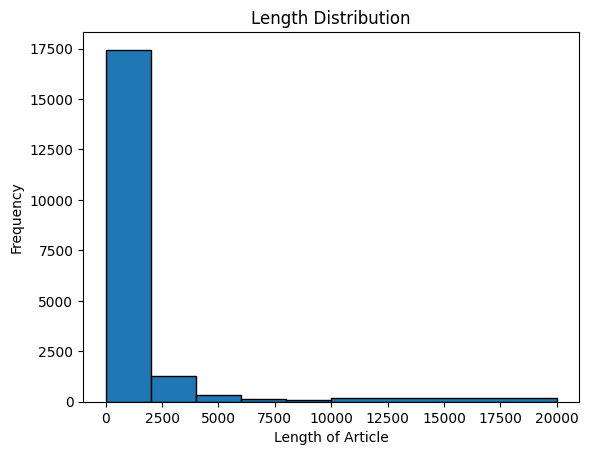

In [549]:
import matplotlib.pyplot as plt

# Plotting the array
bin_edges = [0, 2000, 4000, 6000, 8000, 10000, 20000]  # Adjust these edges according to your needs

# Plotting the histogram
plt.hist(maxlens, bins=bin_edges, edgecolor='black')

# Adding labels and title
plt.xlabel('Length of Article')
plt.ylabel('Frequency')
plt.title('Length Distribution')

# Displaying the plot
plt.show()

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('finalbendatasetwithpreds.csv')

arts = data['Reasoning'].to_list()
f = [0] * len(arts)
h = [0] * len(arts)
l = [0] * len(arts)
s = [0] * len(arts)
n = [0] * len(arts)
#arts = financial_problem_df['Text'].to_list()
financialpred = [0] * len(arts) 
reason = [""] * len(arts)

In [3]:
data.shape

(22021, 28)

In [4]:
multi = 0
fi = 0
sc = 0
le = 0
he = 0

finalreason = [""] * len(arts)

for i in range(len(arts)):
    chatgpt_output = arts[i]
    if ("1: No" in chatgpt_output):
        reason[i] = "NotSuicide"
        continue
    if ("NotSuicide" in chatgpt_output or "TooManyTokens" in chatgpt_output):
        continue
    split = chatgpt_output.split('\\n')
    for sp in split:
        if "Answer 2" in sp:
            chatgpt_output = sp
        if ("Reasoning" in sp):
            finalreason[i] = sp.replace("Reasoning: ", "")
    #print(chatgpt_output)
    n[i] = 1
    if ('Legal Problem' in chatgpt_output):
        l[i] = 1
        n[i] = 0
    if ('Financial/Job Problem' in chatgpt_output):
        f[i] = 1
        n[i] = 0
    if ('School Problem' in chatgpt_output):
        s[i] = 1
        n[i] = 0
    if ('Health Problem' in chatgpt_output):
        h[i] = 1
        n[i] = 0
    # if (l[i] + f[i] + h[i] + s[i] > 1):
    #     multi = multi + 1
    #     if (f[i] == 1):
    #         fi = fi + 1 
    #     if (h[i] == 1):
    #         he = he + 1 
    #     if (l[i] == 1):
    #         le = le + 1 
    #     if (s[i] == 1):
    #         sc = sc + 1 
        #print(chatgpt_output)
#print(multi)

#print(fi)
#print(le)
#print(sc)
#print(he)

#print("Multi label: ",data[(data[HealthPredicted] + data[FinancialPredicted] + data[LegalPredicted] + data[SchoolPredicted] > 1)].shape[0])

#print("Multi label: ",data[(data[HealthPredicted] + data[FinancialPredicted] + data[LegalPredicted] + data[SchoolPredicted] > 1)].shape[0])


In [5]:
count = 0
for i  in n:
    if i == 1:
        count = count + 1
print(count)

4373


In [6]:
data['None - Predicted'] = n
data.to_csv('finalbendatasetwithpreds.csv')